# Final Case Study 07

### Problem Statement: 

Welcome to our final case study. It is important to note that this case study serves as the final for the course. Thus, its scoring is double the standard case study. Another thing to note for this case study is that you are free to use or employ any of the methods we have studied in the course, there will be no guidance as to use method x or method y or which method might be the most advantageous. You are entirely on your own to make those decisions.

There is a video that will introduce the data set. However, because this data set also simulates an unknown or private data set, there are not many details available. This is also a good example of what you might see for a job interview. Keep that in mind. And remember, make your best effort to find the best final result.

-------
OK, I have a private project. So the data is anonymous. And I'll be giving you the anonymized data.

I want you to predict the classroom. So at the end, the last column is the class. I want you to predict for this data set.

So what concerns me is that every time I make it into a production, I lose money. And so for every time we predict class 1 and it's not class 1, I lose $100. 

And then say we predict class 0 and it is not class zero, there goes another $25.

My goal is I would like a model that actually predicts the class that minimizes my financial losses, and that's it. I just need to stop wasting so much money.


How about model explainability? Do you care about any insights that we might find?

No, no. No, I don't. Just keep this in mind. I hate losing money more than I like making it. That's my bottom line. Save the money. I could care less about anything else.


In [44]:
import pandas as pd   
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
#import altair as alt 
#alt.data_transformers.enable('data_server')  
import numpy as np 

import zipfile

from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics as mt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE 
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
# Display all columns 
pd.options.display.max_columns = None



## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.decomposition import PCA


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import time

import warnings
warnings.filterwarnings("ignore")

In [2]:
#User Defined Functions

    
# This function creates dummy encodings from a lsit of features of interest and returns a dataframe     
def create_dummy_encod(df_encoding, features_of_interest, drop_first_cat=True, sparsity=True): 
    tmp_cont = []
    df_data_copy = df_encoding.copy()
    for feat in features_of_interest: 
        tmp_df = pd.get_dummies(df_data_copy[feat],prefix=str(feat),sparse=sparsity,drop_first=drop_first_cat)
        tmp_cont.append(tmp_df)
        feat_df = pd.concat(tmp_cont,axis=1)
        df_encoding = pd.concat([df_data_copy,feat_df], axis=1)
        df_encoding = df_encoding.drop(columns = features_of_interest, axis = 1)
    return df_encoding

cv = model_selection.StratifiedKFold(n_splits=5,shuffle=True, random_state=1234)


def stratified_cross_validate(model, X, y, cv=cv):
    start = time.time()
    cv_results = model_selection.cross_validate(model, X, y, cv=cv, scoring="accuracy", n_jobs=-1)
    elapsed_time = (time.time() - start) 
    print ('Fold Scores:')
    print(' ')
    print(cv_results['test_score'])
    print(' ')
    print('Mean Accuracy: ', cv_results['test_score'].mean())
    print('Mean Fit Time: ', cv_results['fit_time'].mean())
    print('Mean Score Time: ', cv_results['score_time'].mean())
    print('CV Time: ', elapsed_time)
    return


def plot_confusion_matrix(y_test, y_hat):
    cm=metrics.confusion_matrix(y_test, y_hat)
    cm/np.sum(cm)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{var1}\n{var2}\n{var3}" for var1,var2,var3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    plt.figure(figsize=(7,5))

    sns.heatmap(cm,
                annot=labels,
                fmt='',
                cmap='coolwarm',
                xticklabels=['Negative or 0','Positive or 1'],
                yticklabels=['Negative or 0','Positive or 1'],
                annot_kws={'size':16})

    plt.title('Confusion Matrix')
    plt.show()
    
def plot_roc_curve(y_test, y_hat):
    rf_roc_auc = metrics.roc_auc_score(y_test,y_hat)
    print('LR ROC:',rf_roc_auc)
    # plot the ROC curve from logistic regression
    logit_roc_auc = metrics.roc_auc_score(y_test, y_hat)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_hat)
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'b--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [3]:
#df = pd.read_csv('final_project(5).csv')
archive = zipfile.ZipFile('/Users/suchismitamoharana/Documents/GitHub/QTW/CaseStudy7/data/final_project.csv.zip', 'r')
csvfile = archive.open('final_project.csv')
df = pd.read_csv(csvfile)

In [4]:
df.head(3)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,6.187465,13.251523,25.665413,-5.017267,10.503714,-2.517678,2.117910,5.865923,-6.666158,1.791497,-1.909114,-1.737940,-2.516715,3.553013,euorpe,-0.801340,1.142950,1.005131,-18.473784,July,tuesday,-3.851669,0.0%,-1.940031,-5.492063,0.627121,-0.873824,$1313.96,-1.353729,-5.186148,-10.612200,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,-11.708859,-2.352809,-25.014934,9.799608,-10.960705,1.504000,-2.397836,-9.301839,-1.999413,5.045258,-5.809984,10.814319,-0.478112,10.590601,asia,0.818792,-0.642987,0.751086,3.749377,Aug,wednesday,1.391594,-0.02%,2.211462,-4.460591,1.035461,0.228270,$1962.78,32.816804,-5.150012,2.147427,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,1.572647,-4.170771,12.078602,-5.158498,7.302780,-2.192431,-4.065428,-7.675055,4.041629,-6.633628,1.700321,-2.419221,2.467521,-5.270615,asia,-0.718315,-0.566757,4.171088,11.522448,July,wednesday,-3.262082,-0.01%,0.419607,-3.804056,-0.763357,-1.612561,$430.47,-0.333199,8.728585,-0.863137,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      159974 non-null  float64
 1   x1      159975 non-null  float64
 2   x2      159962 non-null  float64
 3   x3      159963 non-null  float64
 4   x4      159974 non-null  float64
 5   x5      159963 non-null  float64
 6   x6      159974 non-null  float64
 7   x7      159973 non-null  float64
 8   x8      159979 non-null  float64
 9   x9      159970 non-null  float64
 10  x10     159957 non-null  float64
 11  x11     159970 non-null  float64
 12  x12     159964 non-null  float64
 13  x13     159969 non-null  float64
 14  x14     159966 non-null  float64
 15  x15     159965 non-null  float64
 16  x16     159974 non-null  float64
 17  x17     159973 non-null  float64
 18  x18     159960 non-null  float64
 19  x19     159965 non-null  float64
 20  x20     159962 non-null  float64
 21  x21     15

In [6]:
# Display general statistic 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
x0,159974.0,-0.001028,0.371137,-1.592635,-0.251641,-0.002047,0.248532,1.600849
x1,159975.0,0.001358,6.340632,-26.278302,-4.260973,0.004813,4.284220,27.988178
x2,159962.0,-1.150145,13.273480,-59.394048,-10.166536,-1.340932,7.871676,63.545653
x3,159963.0,-0.024637,8.065032,-35.476594,-5.454438,-0.031408,5.445179,38.906025
x4,159974.0,-0.000549,6.382293,-28.467536,-4.313118,0.000857,4.306660,26.247812
x5,159963.0,0.013582,7.670076,-33.822988,-5.148130,0.014118,5.190749,35.550110
x6,159974.0,-1.670670,19.298665,-86.354483,-14.780146,-1.948594,11.446931,92.390605
x7,159973.0,-7.692795,30.542264,-181.506976,-27.324771,-6.956789,12.217071,149.150634
x8,159979.0,-0.030540,8.901185,-37.691045,-6.031058,-0.016840,5.972349,39.049831
x9,159970.0,0.005462,6.355040,-27.980659,-4.260619,0.006045,4.305734,27.377842


In [7]:
# Categorical variables 
col_dtype = pd.DataFrame(df.dtypes.copy())
cat_var = col_dtype[col_dtype[0]=='object'].reset_index()
print('Catagorical Variables are:')
cat_var['index'].tolist()

Catagorical Variables are:


['x24', 'x29', 'x30', 'x32', 'x37']

In [8]:
col_dtype = pd.DataFrame(df.dtypes.copy())
Numeric_var = col_dtype[col_dtype[0]=='float64'].reset_index()
print('Continuous numerical Variables are:')
print(Numeric_var['index'].tolist())

Continuous numerical Variables are:
['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x25', 'x26', 'x27', 'x28', 'x31', 'x33', 'x34', 'x35', 'x36', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49']


In [9]:
print('Type of target feature is:',df['y'].dtypes)

Type of target feature is: int64


In [10]:
print('Total Number of rows with missing value or blank rows are: ',len(df.loc[df.isnull().any(axis=1)]))

Total Number of rows with missing value or blank rows are:  1608


In [11]:
# check for missing rows 
# find rows with missing values 
df.loc[df.isnull().any(axis=1)].reset_index()

,index,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,29,-0.321393,-5.910640,6.243552,-12.936755,4.847573,11.270850,9.077655,-33.353069,-5.373054,3.055698,12.375181,6.276383,12.958260,-15.040050,-0.785022,4.389060,1.547859,5.035978,-6.555562,1.328496,6.476097,3.097804,0.374001,-8.478925,asia,-0.583715,-1.306269,4.238877,11.957704,Jun,tuesday,-4.633517,0.01%,3.809137,9.212996,-1.213837,3.157790,$41.97,41.174840,-0.292937,-25.146354,45.536116,5.295248,NaN,-7.541517,0.202396,-7.226681,-2.508254,-3.089376,-0.269219,0
1,48,-0.927155,-7.290313,6.049319,-3.980340,-12.851658,2.197959,8.795256,NaN,1.399448,-0.199977,13.778939,-22.925212,0.993760,3.230346,5.426205,3.216886,-0.232795,7.170554,4.314549,-5.066262,2.680485,7.105866,6.079266,14.085750,asia,1.401970,2.041526,0.804576,12.341686,Aug,wednesday,0.891255,-0.01%,-0.606526,9.832084,-1.380931,2.193168,$-12.02,11.781942,9.615745,-12.422347,13.029896,-2.101706,-0.150942,-1.161704,-0.600030,-21.211359,7.546942,-0.504204,-4.783417,0
2,126,0.327565,-0.544186,-6.928746,-5.659393,-3.423373,-1.850306,-10.073876,-8.432450,24.492095,-5.653426,0.523251,7.164838,-14.214384,-1.479915,-8.808222,0.915305,-2.099955,5.260727,-2.132495,-2.809538,5.761076,4.055675,-4.430134,0.307277,asia,-0.151255,-0.181496,-13.850191,-7.484323,NaN,wednesday,-2.996248,0.01%,-1.355772,-6.787575,0.923852,-1.715584,$-169.91,14.798624,-1.252185,-20.295036,16.366108,-9.924910,-0.144486,-1.511031,-0.057357,-69.130267,1.264002,0.317753,6.095717,0
3,151,1.062456,0.178589,-1.579185,-6.073041,-4.328384,-12.455219,-2.296016,-60.919564,-10.490058,1.430530,-0.130344,-0.070219,1.085640,-1.130498,-3.981938,3.706298,-4.555485,4.588869,8.424605,4.186479,2.052008,-15.898509,5.683897,17.456065,asia,-1.166043,0.141882,7.422145,1.812905,July,wednesday,1.040744,-0.0%,-0.522262,8.813230,4.668976,-0.429244,$-585.38,17.779507,NaN,-18.986416,19.662729,-8.943095,0.503985,2.924478,-0.375100,-31.947110,6.230095,-2.717568,-11.463633,1
4,152,-0.708329,4.782119,-4.878719,-0.415667,-8.783684,4.117973,-7.093291,40.410110,-18.559044,5.335397,-6.944081,2.587280,-23.169389,-1.328948,-3.021905,3.714684,4.189758,-11.907488,-4.827106,0.956506,1.626214,2.676786,3.470083,4.134424,asia,-0.508811,0.175472,-15.175948,-6.677055,Aug,wednesday,3.185449,0.01%,0.396615,1.703734,-0.674757,0.300194,$-288.22,-12.610225,5.267032,-2.238515,-13.945912,-5.367317,-0.720417,4.093962,NaN,-64.118235,-5.258002,1.241856,1.561127,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,159524,NaN,-2.165941,-1.284000,4.639639,7.802849,-4.523995,-1.866839,-26.549018,-14.386324,8.928974,6.052711,-13.972060,-5.720597,0.269799,5.987738,2.603426,-3.106369,-11.951127,8.006679,10.210273,-4.328645,-1.452938,7.688060,-7.929690,asia,2.804466,0.204129,-0.716864,-14.823166,July,tuesday,7.772505,-0.0%,1.070970,5.509634,1.078483,0.733757,$425.93,4.651896,2.685754,3.044358,5.144629,-10.483022,-0.792033,1.068493,0.011993,-9.503397,-5.369742,-2.182339,-2.731345,0
1604,159533,0.151326,-4.604867,-20.350372,5.346483,-2.504269,-22.177503,-29.587911,8.920035,-4.699955,6.742354,11.834039,-6.146477,0.536170,15.443208,4.959642,0.450658,0.329164,-10.745665,0.550666,7.694656,5.085487,-11.446280,0.052815,5.946747,asia,0.036602,1.423447,0.936650,NaN,Aug,wednesday,4.111769,-0.0%,0.812853,15.604803,0.527510,-1.120055,$-1657.81,-5.415954,2.301754,-4.755737,-5.989616,0.734525,-0.176172,-2.369735,-0.077160,-18.910637,-10.486141,2.308942,19.555041,1
1605,159785,0.216104,-4.368705,3.088548,-2.881755,13.214596,-13.836370,4.490516,-35.446270,-9.185199,0.164436,-7.519120,-4.674200,-12.070108,1.007937,-2.891638,2.306683,-6.659109,0.908332,-5.366409,-3.296333,-10.434679,-0.611029,3.014618,-1.622449,asia,0.672202,-0.9905

In [12]:
# Checking one specific row with total number of missing values
df['x0'].isnull().sum()

26

In [13]:
# Checking what percentage of missing values are present in each columns 
df.isna().sum()/len(df)*100

x0     0.016250
x1     0.015625
x2     0.023750
x3     0.023125
x4     0.016250
x5     0.023125
x6     0.016250
x7     0.016875
x8     0.013125
x9     0.018750
x10    0.026875
x11    0.018750
x12    0.022500
x13    0.019375
x14    0.021250
x15    0.021875
x16    0.016250
x17    0.016875
x18    0.025000
x19    0.021875
x20    0.023750
x21    0.018125
x22    0.016875
x23    0.029375
x24    0.017500
x25    0.013750
x26    0.022500
x27    0.018750
x28    0.021875
x29    0.018750
x30    0.018750
x31    0.024375
x32    0.019375
x33    0.025625
x34    0.025625
x35    0.018750
x36    0.016875
x37    0.014375
x38    0.019375
x39    0.014375
x40    0.022500
x41    0.025000
x42    0.016250
x43    0.023125
x44    0.025000
x45    0.018125
x46    0.019375
x47    0.023125
x48    0.020000
x49    0.020000
y      0.000000
dtype: float64

In [14]:
miss_val=df.isna().sum()/len(df)*100

print('Max percent of missing value = ',miss_val.max())

Max percent of missing value =  0.029375000000000002


In [15]:
df = df.dropna() 

In [16]:
# checking data after dropping missing values
df.isna().sum()/len(df)*100

x0     0.0
x1     0.0
x2     0.0
x3     0.0
x4     0.0
x5     0.0
x6     0.0
x7     0.0
x8     0.0
x9     0.0
x10    0.0
x11    0.0
x12    0.0
x13    0.0
x14    0.0
x15    0.0
x16    0.0
x17    0.0
x18    0.0
x19    0.0
x20    0.0
x21    0.0
x22    0.0
x23    0.0
x24    0.0
x25    0.0
x26    0.0
x27    0.0
x28    0.0
x29    0.0
x30    0.0
x31    0.0
x32    0.0
x33    0.0
x34    0.0
x35    0.0
x36    0.0
x37    0.0
x38    0.0
x39    0.0
x40    0.0
x41    0.0
x42    0.0
x43    0.0
x44    0.0
x45    0.0
x46    0.0
x47    0.0
x48    0.0
x49    0.0
y      0.0
dtype: float64

In [17]:
# checking data size after dropping missing values
df.shape

(158392, 51)

In [18]:
df.head(2)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,6.187465,13.251523,25.665413,-5.017267,10.503714,-2.517678,2.117910,5.865923,-6.666158,1.791497,-1.909114,-1.737940,-2.516715,3.553013,euorpe,-0.801340,1.142950,1.005131,-18.473784,July,tuesday,-3.851669,0.0%,-1.940031,-5.492063,0.627121,-0.873824,$1313.96,-1.353729,-5.186148,-10.612200,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,-11.708859,-2.352809,-25.014934,9.799608,-10.960705,1.504000,-2.397836,-9.301839,-1.999413,5.045258,-5.809984,10.814319,-0.478112,10.590601,asia,0.818792,-0.642987,0.751086,3.749377,Aug,wednesday,1.391594,-0.02%,2.211462,-4.460591,1.035461,0.228270,$1962.78,32.816804,-5.150012,2.147427,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0


In [19]:
# Remove % symbol form x32
df['x32'] = df['x32'].map(lambda x:x.rstrip('%')) 
# Next remove $ and 
df['x37']=df['x37'].map(lambda x: x.lstrip('$')) 

In [20]:
print(df['x29'].unique())

len(df[df['x29']=='Dev'])

['July' 'Aug' 'Jun' 'May' 'sept.' 'Apr' 'Nov' 'Oct' 'Mar' 'Feb' 'Dev'
 'January']


23

In [21]:
df['y'].value_counts()

0    94846
1    63546
Name: y, dtype: int64

In [22]:

features_of_interest_encoding =['x24', 'x29', 'x30']
df_dummy_enc = create_dummy_encod(df, features_of_interest_encoding, drop_first_cat=True, sparsity=True)

In [23]:
y = df_dummy_enc['y']
X = df_dummy_enc.drop(columns = ['y'], axis = 1)

In [24]:
# Break our data into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234, stratify=y)

In [25]:
#https://nbviewer.jupyter.org/github/jakemdrew/MachineLearningExtras/blob/master/LFW%20Dataset%20and%20Class%20Imbalance.ipynb
cv = model_selection.StratifiedKFold(n_splits=3,shuffle=True, random_state=1234)
model = linear_model.LogisticRegression(solver='liblinear', random_state=1234, max_iter = 1e3)
stratified_cross_validate(model, X_train, y_train, cv=cv)

Fold Scores:
 
[0.70379753 0.70247171 0.70158865]
 
Mean Accuracy:  0.7026192969100059
Mean Fit Time:  9.198298692703247
Mean Score Time:  0.18851129213968912
CV Time:  11.172513008117676


In [26]:
model.fit(X_train, y_train)
y_model_predict = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_model_predict)
print('Accuracy of "Logistic Regression Iteration 1 - Unscaled Data": ', accuracy)

Accuracy of "Logistic Regression Iteration 1 - Unscaled Data":  0.7050096278291613


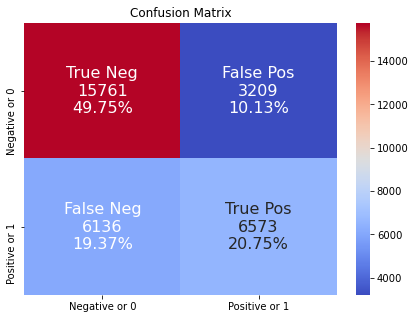

In [27]:
plot_confusion_matrix(y_test, y_model_predict)

LR ROC: 0.6740153531218439


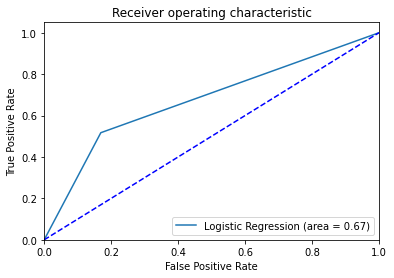

In [28]:
plot_roc_curve(y_test, y_model_predict)

In [29]:
std_scalar = preprocessing.StandardScaler()
X_scaled = std_scalar.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=1234, stratify=y)

In [30]:
cv_scaled = model_selection.StratifiedKFold(n_splits=5,shuffle=True, random_state=1234)
model_scaled = linear_model.LogisticRegression(solver='liblinear', random_state=1234, max_iter = 1e3)
stratified_cross_validate(model_scaled, X_train, y_train, cv=cv_scaled)

Fold Scores:
 
[0.70488892 0.70141656 0.70082469 0.70219399 0.70175992]
 
Mean Accuracy:  0.7022168169033698
Mean Fit Time:  1.8988831996917725
Mean Score Time:  0.005351352691650391
CV Time:  2.8945419788360596


In [31]:
model_scaled.fit(X_train, y_train)
y_model_scaled_predict = model_scaled.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_model_scaled_predict)
print('Accuracy of "Logistic Regression Iteration 2 - scaled Data": ', accuracy)

Accuracy of "Logistic Regression Iteration 2 - scaled Data":  0.7050411944821491


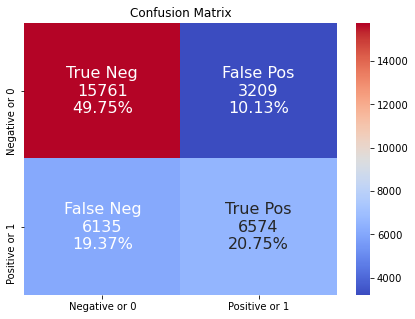

In [32]:
plot_confusion_matrix(y_test, y_model_scaled_predict)

LR ROC: 0.6740546953202861


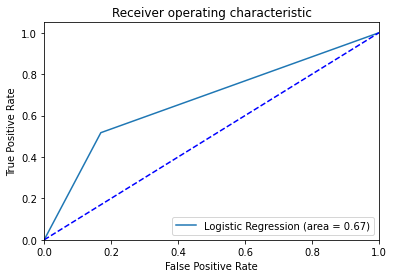

In [33]:
plot_roc_curve(y_test, y_model_scaled_predict)

In [34]:
from sklearn.model_selection import StratifiedKFold 

In [35]:
#Logistic Regression L1 Feature Importance¶
CV = StratifiedKFold(n_splits=5,shuffle=True,random_state=1234)
clf = linear_model.LogisticRegression(penalty='l1',solver='liblinear',class_weight='balanced',C=0.05)
scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=CV)
print('5 fold cross validation accuracy:',scores)
print('Mean Accuracy is : ',scores.mean())

5 fold cross validation accuracy: [0.70816399 0.71155743 0.703863   0.70763949 0.70724489]
Mean Accuracy is :  0.7076937606785437


In [36]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.05, class_weight='balanced', penalty='l1',
                   solver='liblinear')

Text(0.5, 0, "Feature's weight")

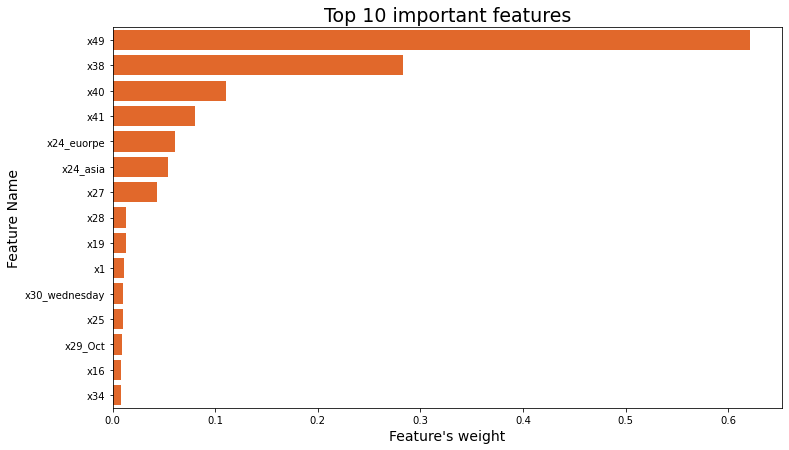

In [37]:
# Create pandas series of features weight and column names 
features_weights_pds = pd.Series(clf.coef_[0],index=X.columns)
features_weights_pds=features_weights_pds.sort_values(ascending=False)
top_ten_features = features_weights_pds.head(15).reset_index()
top_ten_features = top_ten_features.rename(columns={'index':'features',0:'weights'})
top_ten_features

plt.figure(figsize=(12,7))
sns.barplot(y='features',x='weights',data=top_ten_features,color='#FF5E0D')
plt.title('Top 10 important features',size=19)
plt.ylabel('Feature Name',size=14)
plt.xlabel("Feature's weight",size=14)

In [38]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

log_loss for c =  10 is 0.23829186885482784
log_loss for c =  50 is 0.20981994106920607
log_loss for c =  100 is 0.20750390397470128


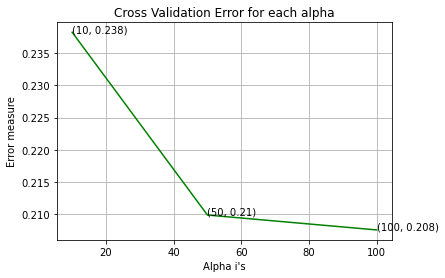

In [39]:
alpharf=[10,50,100]
cv_log_error_array=[]
for i in alpharf:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=1234,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpharf[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpharf, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpharf[i],np.round(txt,3)), (alpharf[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()



log loss for train data 0.03649872095109383
log loss for cv data 0.20750390397470128
log loss for test data 0.20362317760222684
Accuracy of "Random Forest":  0.9197891347580416


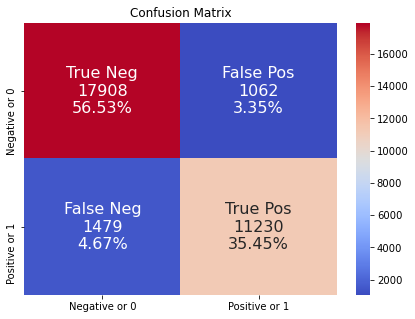

In [40]:
r_cfl=RandomForestClassifier(n_estimators=alpharf[best_alpha],random_state=1234,n_jobs=-1)
r_cfl.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
predict_y = sig_clf.predict_proba(X_train)
print ('log loss for train data',(log_loss(y_train, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv)
print ('log loss for cv data',(log_loss(y_cv, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test)
print ('log loss for test data',(log_loss(y_test, predict_y, labels=sig_clf.classes_, eps=1e-15)))
accuracy = metrics.accuracy_score(y_test, sig_clf.predict(X_test))
print('Accuracy of "Random Forest": ', accuracy)
plot_confusion_matrix(y_test,sig_clf.predict(X_test))

[12:23:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:12] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

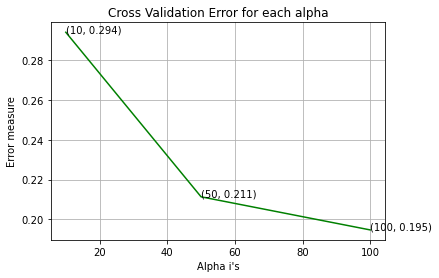

In [41]:
from xgboost import XGBClassifier
alphaxg=[10,50,100]
cv_log_error_array=[]
for i in alphaxg:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alphaxg[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alphaxg, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alphaxg[i],np.round(txt,3)), (alphaxg[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()



[12:28:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:28:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:28:54] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

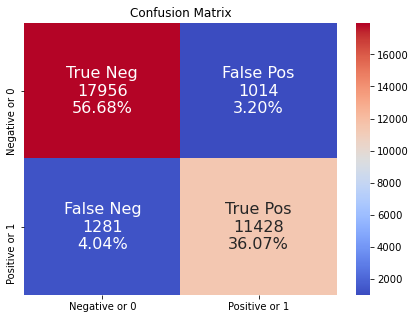

In [42]:
x_cfl=XGBClassifier(n_estimators=alphaxg[best_alpha],nthread=-1)
x_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)

print ('For values of best alpha = ', alphaxg[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alphaxg[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alphaxg[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
accuracy = metrics.accuracy_score(y_test, sig_clf.predict(X_test))
print('Accuracy of "XGBoost": ', accuracy)
plot_confusion_matrix(y_test,sig_clf.predict(X_test))

In [43]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, sig_clf.predict(X_test), average="macro")

(0.9259557119375014, 0.9228762336744912, 0.9243418081013621, None)

From XGBoost, we are getting accuracy of 92% with False positive of 3.02% and False Negative of 4.05 %